# Titanic - Kaggle Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier


In [2]:
train_data = pd.read_csv(r'C:\Users\17813\Desktop\Python Datasets\Titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\17813\Desktop\Python Datasets\Titanic\test.csv')

## Dataset
<pre>
<b>Variable	 Definition	             Key</b>
survival	 Survival	               0 = No, 1 = Yes
pclass	   Ticket class	           1 = 1st, 2 = 2nd, 3 = 3rd
sex	      Sex	
Age	      Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	   Ticket number	
fare	     Passenger fare	
cabin	    Cabin number	
embarked	 Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton
</pre>

## EDA

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There seems to be some missing values in the columns 'Age', 'Cabin', and 'Embarked' in the training dataset because these columns do not have 891 values. There are also some missing values in 'Age', 'Cabin', and 'Fare' in the testing dataset. I will deal with these columns after the EDA.

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is a mix of numerical and categorical data. I will start off by observing the distribution of the numerical variables. 'Survived' is our response variable and should be treated as categorical since there are only two options: 0 and 1.
<br>
<br>
'Pclass' can also be treated as a categorical varible because there are only 3 categories: 1, 2 and 3. 'PassengerId' will be ignored because it is as used as an identifier.
<br>
<br>
The numerical variables are: 'Age', 'SibSp', 'Parch', 'Fare'.

C:\Users\17813\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\17813\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


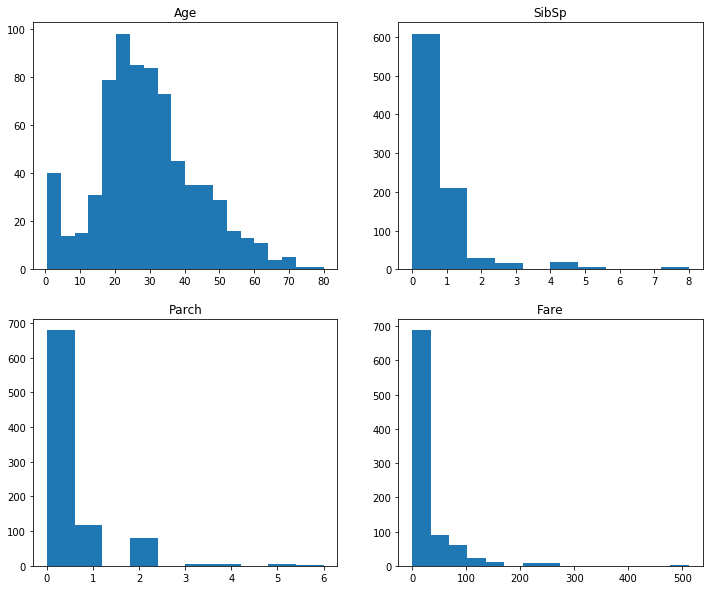

In [8]:
#set figsize
plt.figure(1, figsize=(12,10))

#Age hist
plt.subplot(2, 2, 1)
plt.hist(train_data['Age'], bins=20)
plt.gca().set_title('Age')

#SibSp hist
plt.subplot(2, 2, 2)
plt.hist(train_data['SibSp'])
plt.gca().set_title('SibSp')

#Parch hist
plt.subplot(2, 2, 3)
plt.hist(train_data['Parch'])
plt.gca().set_title('Parch')

#Fare hist
plt.subplot(2, 2, 4)
plt.hist(train_data['Fare'], bins=15)
plt.gca().set_title('Fare');

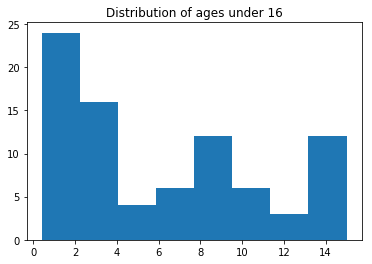

In [9]:
plt.hist(train_data[(train_data['Age'].notnull()) & (train_data['Age'] < 16)]['Age'], bins=8)
plt.title('Distribution of ages under 16');

<b>Age</b>: we can see that the majority of passengers are around the age of 20-40. There are also more infant and toddlers compared to grade schoolers. 
<br>
<b>SibSp and Parch</b>: most passengers came alone. Most passengers that didn't come alone came with either a sibling or spouse compared to coming with a parent or child.
<br>
<b>Fare</b>: most passengers paid a fare of under 100, with the majority paying under 50. There were a few outlier passengers that paid a large fare of 200+ and even 500.

I will now look at the categorical variables which are 'Survived', 'Pclass', 'Sex', 'Cabin', and 'Embarked'.
<br>
<br>
It is important to note that there is a large amount of missing values in the 'Cabin' variable. About 77% of the values are missing. I will exclude this column in my analysis and model because of the high number of missing values.

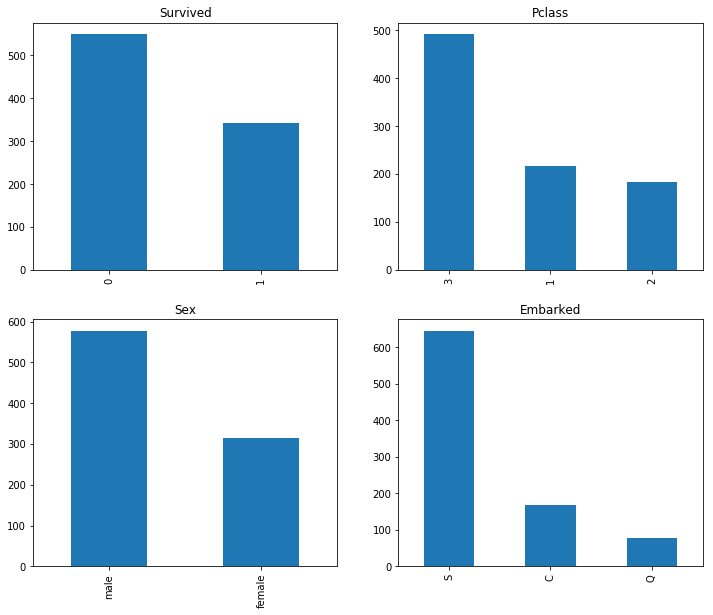

In [10]:
#set figsize
plt.figure(1, figsize=(12,10))

#plot Survived
plt.subplot(2, 2, 1)
train_data['Survived'].value_counts().plot(kind='bar')
plt.gca().set_title('Survived')

#plot Pclass
plt.subplot(2, 2, 2)
train_data['Pclass'].value_counts().plot(kind='bar')
plt.gca().set_title('Pclass')

#plot Sex
plt.subplot(2, 2, 3)
train_data['Sex'].value_counts().plot(kind='bar')
plt.gca().set_title('Sex')

#plot Embarked
plt.subplot(2, 2, 4)
train_data['Embarked'].value_counts().plot(kind='bar')
plt.gca().set_title('Embarked');

In [11]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [12]:
train_data['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [13]:
train_data['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [14]:
train_data['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

<b>Survived</b>: More passengers did not survive compared to passengers that survived. (~62% compared to ~38%)
<br>
<b>Pclass</b>: ~55% of passengers purchased 3rd class tickets, ~21% purchased 2nd class, and ~24% purchased 1st class.
<br>
<b>Sex</b>: Almost 2/3 of the passengers onboard were male compared to 1/3 who were female.
<br>
<b>Embarked</b>: Most of the passengers boarded in Southampton (~72%), ~19% boarded in Cherbourg, and ~9% boarded in Queenstown.

#### Categorical variables

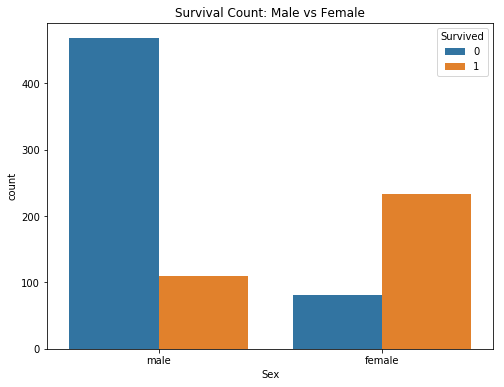

In [15]:
#set figsize
plt.figure(1, figsize=(8,6))

#plot survival male vs female
sns.countplot('Sex', hue='Survived', data=train_data)
plt.title('Survival Count: Male vs Female');

In [16]:
train_data[train_data['Sex'] == 'female']['Survived'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [17]:
train_data[train_data['Sex'] == 'male']['Survived'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

Surprisingly, the survival rate among female passengers in the training dataset is very high compared to the survival rate among male passengers. ~74% of female passengers survived compared to the ~19% of male passengers that survived. As we saw earlier, 2/3 of the passengers onboard were male and 1/3 of the passengers were female, but the number of women that survived is more than double that of the men (233 women survived compared to 109 men survived).
<br>
<br>
It could be that women were prioritized during the evacuation which meant that they had a higher chance of survival.

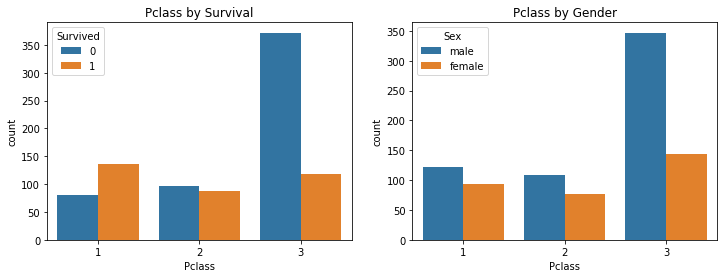

In [18]:
#set figsize
plt.figure(1, figsize=(12,4))

#plot survival in each Pclass
plt.subplot(1, 2, 1)
sns.countplot('Pclass', hue='Survived', data=train_data)
plt.title('Pclass by Survival')

#plot gender in each Pclass
plt.subplot(1, 2, 2)
sns.countplot('Pclass', hue='Sex', data=train_data)
plt.title('Pclass by Gender');

In [19]:
train_data.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

It appears 1st class passengers had the highest survival rate of ~63% compared to 2nd and 3rd class passengers which had survival rates of ~47% and ~24% respectively. The survival rate drops almost 20% for each passenger class which is quite a large difference. As mentioned earlier, ~55% of all passengers onboard were 3rd class passengers. Did overcrowding affect the evacuation which then impacted the survival rate?
<br>
<br>
Looking at Pclass by gender, there were more men in each Pclass compared to women. Let's look at the survival rate of men vs. women within each Pclass.

In [20]:
train_data.groupby(['Pclass','Sex'])['Survived'].value_counts(normalize=True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64

In [21]:
train_data.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<b>Pclass 1</b>: Women had a higher survival rate compared to men in 1st class (~97% vs. ~37%). Although women had a higher survival rate, men in 1st class still had a higher survival rate compared to men in 2nd and 3rd class.
<br>
<b>Pclass 2</b>: Women have a similar survival rate in 2nd class at ~92%, The survival rate among men dropped to ~16% in 2nd class. There is approximately a 76% gap in survival rate between men and women in 2nd class.
<br>
<b>Pclass 3</b>: The survival rate dropped for women to 50%. The surival rate for men in 3rd class is ~14%.
<br>
<br>
It seems like women were given priority during evacuation in each passenger class as shown in the survival rates above especially in 1st and 2nd class. 3 out of the 94 women in 1st class did not survive and 6 out of the 76 women in 2nd class did not survive. The survival rate of men in 1st class is still lower than the surival rate of women in 3rd class (~37% vs. 50% respectively).
<br>
<br>
Let's take a look at survival rate grouped by embarking location and also Pclass grouped by embarking location.

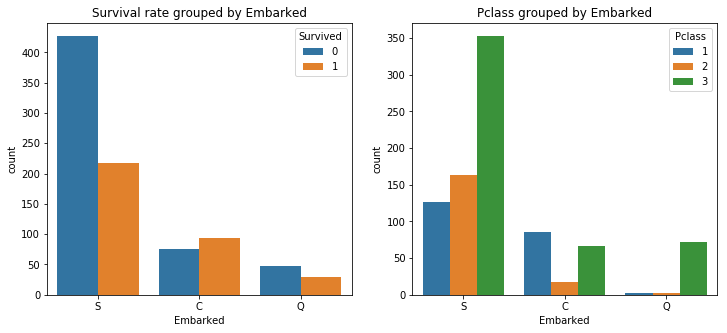

In [22]:
#set figsize
plt.figure(1, figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot('Embarked', hue='Survived', data=train_data)
plt.title('Survival rate grouped by Embarked');

plt.subplot(1, 2, 2)
sns.countplot('Embarked', hue='Pclass', data=train_data)
plt.title('Pclass grouped by Embarked');

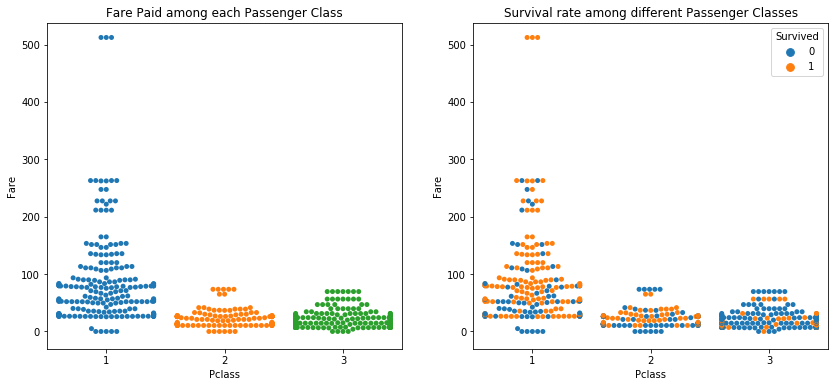

In [23]:
plt.figure(1, figsize=(14,6))

plt.subplot(1, 2, 1)
sns.swarmplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Paid among each Passenger Class');

plt.subplot(1, 2, 2)
sns.swarmplot(x='Pclass', y='Fare', hue='Survived',data=train_data)
plt.title('Survival rate among different Passenger Classes');

C:\Users\17813\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


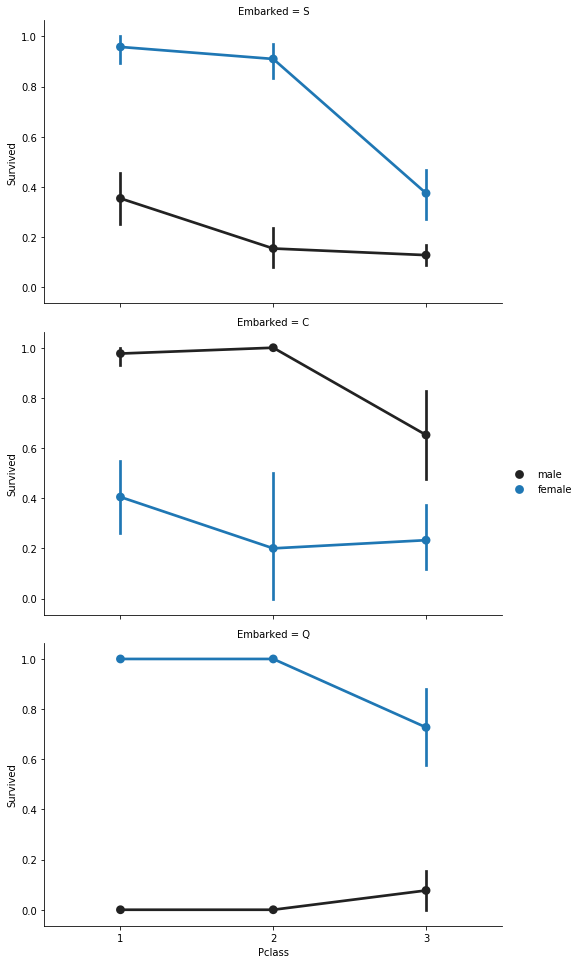

In [24]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend();

In [25]:
train_data.groupby(['Embarked','Sex'])['Survived'].value_counts(normalize=True)

Embarked  Sex     Survived
C         female  1           0.876712
                  0           0.123288
          male    0           0.694737
                  1           0.305263
Q         female  1           0.750000
                  0           0.250000
          male    0           0.926829
                  1           0.073171
S         female  1           0.689655
                  0           0.310345
          male    0           0.825397
                  1           0.174603
Name: Survived, dtype: float64

More than 50% of the passengers that embarked in Cherbourg survived compared to the other two locations which are well below 50%. When you look at 'Pclass' grouped by 'Embarked', you can see that the majority of passengers that embarked in Cherbourg were in 1st class. The majority of passengers that embarked in Southampton and Queenstown had 3rd class tickets.
<br>
<br>
It is also important to note that that the 1st class passengers paid more than 2nd and 3rd class. In the swarmplot, we can see that the passengers who paid a higher fare had a higher survival rate. 

#### Numerical variables

Let's take a look at 'Age' and see if it had a factor in survival.

C:\Users\17813\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\17813\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


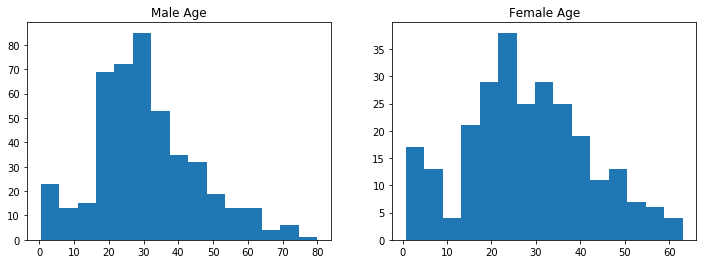

In [26]:
#set figsize
plt.figure(1, figsize=(12,4))

#male Age hist
plt.subplot(1, 2, 1)
plt.hist(train_data[train_data['Sex'] == 'male']['Age'], bins=15)
plt.gca().set_title('Male Age')

#female Age hist
plt.subplot(1, 2, 2)
plt.hist(train_data[train_data['Sex'] == 'female']['Age'], bins=15)
plt.gca().set_title('Female Age');

In [27]:
train_data[train_data['Sex'] == 'male']['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
train_data[train_data['Sex'] == 'female']['Age'].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

The age distribution of male and female are roughly the same with a slight difference in means.

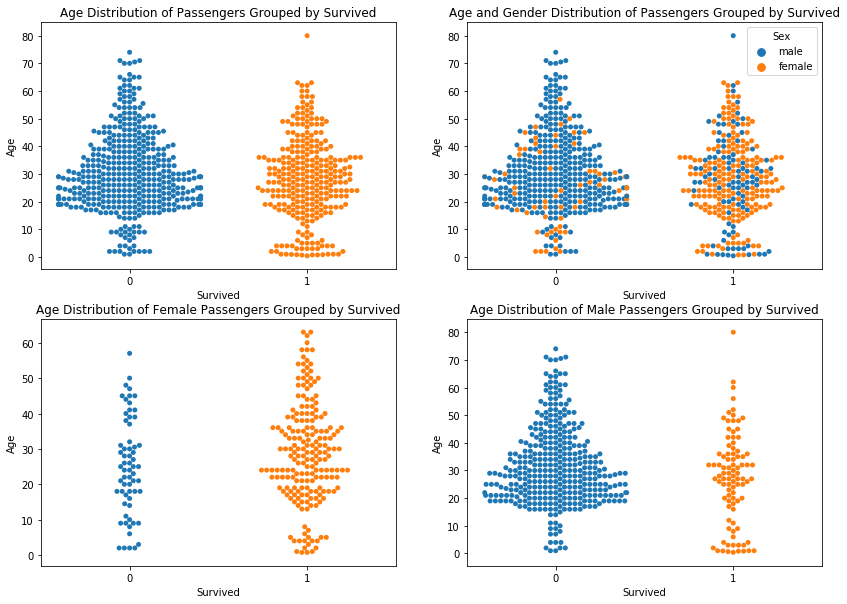

In [29]:
#set figsize
plt.figure(1, figsize=(14,10))

#plot age distribution grouped by Survived
plt.subplot(2, 2, 1)
sns.swarmplot(x='Survived', y='Age', data=train_data);
plt.title('Age Distribution of Passengers Grouped by Survived')

#plot age distribution grouped by Survived with Gender hue
plt.subplot(2, 2, 2)
sns.swarmplot(x='Survived', y='Age',  hue='Sex', data=train_data);
plt.title('Age and Gender Distribution of Passengers Grouped by Survived')


#plot age distribution of female passengers grouped by Survived
plt.subplot(2, 2, 3)
sns.swarmplot(x='Survived', y='Age', data=train_data[train_data['Sex'] == 'female'])
plt.title('Age Distribution of Female Passengers Grouped by Survived')

#plot age distribution of male passengers grouped by Survived
plt.subplot(2, 2, 4)
sns.swarmplot(x='Survived', y='Age', data=train_data[train_data['Sex'] == 'male']);
plt.title('Age Distribution of Male Passengers Grouped by Survived');

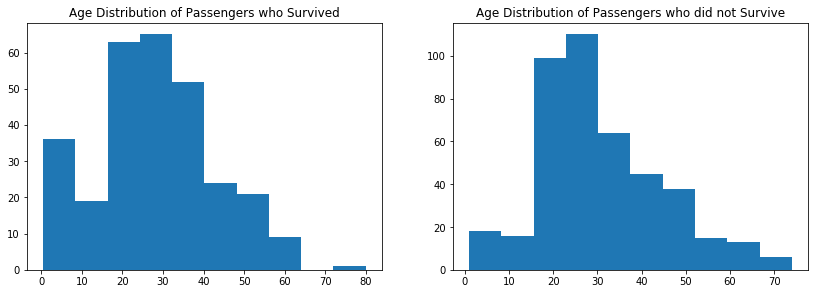

In [30]:
#set figsize
plt.figure(1, figsize=(14,10))

#plot age distribution grouped by Survived
plt.subplot(2, 2, 1)
plt.hist(train_data[train_data['Survived'] == 1]['Age'])
plt.title('Age Distribution of Passengers who Survived')

#plot age distribution grouped by Survived with Gender hue
plt.subplot(2, 2, 2)
plt.hist(train_data[train_data['Survived'] == 0]['Age'])
plt.title('Age Distribution of Passengers who did not Survive');

In the histogram above, it looks like younger passengers have a higher survival rate compared to older and middle aged passengers. It seems that the priority was given to younger passengers and females.

Let's check if passengers who came with a sibling, spouse, parent, or child had a higher survival rate than those who didn't.

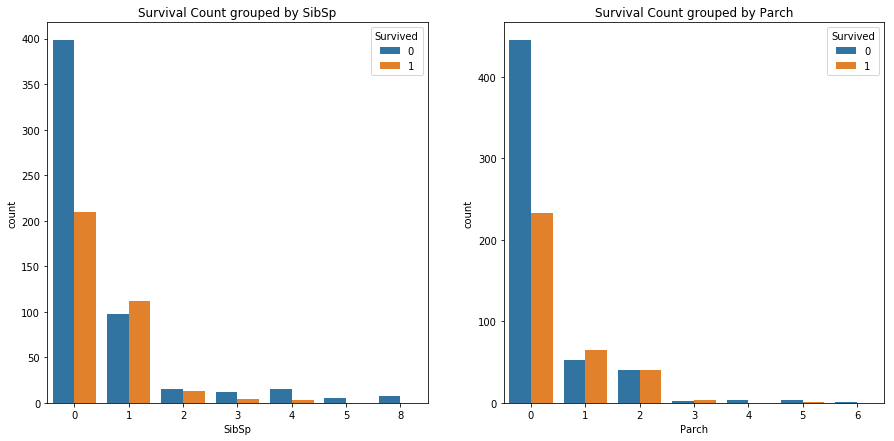

In [31]:
#set figsize
plt.figure(1, figsize=(15,7))

#plot survival count grouped by SibSp
plt.subplot(1, 2, 1)
sns.countplot('SibSp', hue='Survived', data=train_data)
plt.title('Survival Count grouped by SibSp')
plt.legend(loc = 'upper right', title="Survived")

#plot survival count grouped by Parch
plt.subplot(1, 2, 2)
sns.countplot('Parch', hue='Survived', data=train_data)
plt.title('Survival Count grouped by Parch')
plt.legend(loc = 'upper right', title="Survived");

<b>SibSp</b>: The survival rate appears to be higher for passengers had either 1 or 2 siblings or spouse onboard compared to passengers who had none or 3+.
<br>
<b>Parch</b>: The survival rate for passengers who had between 1-3 parent or children is higher compared to passengers who had none or 4+. 
<br>
<br>
As mentioned above, passengers who are under age 10 seemed to have a higher survival rate which might explain why passengers who have a 'Parch' of 1-3 have a higher survival rate because of how the two are variables are related. Parties of 2-4 have a higher chance of survival based on the graphs above.

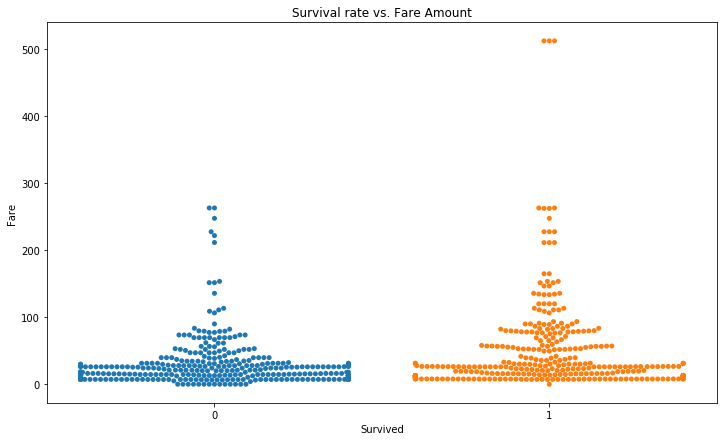

In [32]:
#set figsize
plt.figure(1, figsize=(12,7))

sns.swarmplot(x='Survived', y='Fare', data=train_data)
plt.title('Survival rate vs. Fare Amount');

Passengers who had a higher fare appear to have a higher survival rate. Earlier, we saw that passengers in 1st class had the highest survival rate, so this reinforces that statement.

#### Correlation
<br>
I will use a heatmap to see if the numerical variables are correlated.

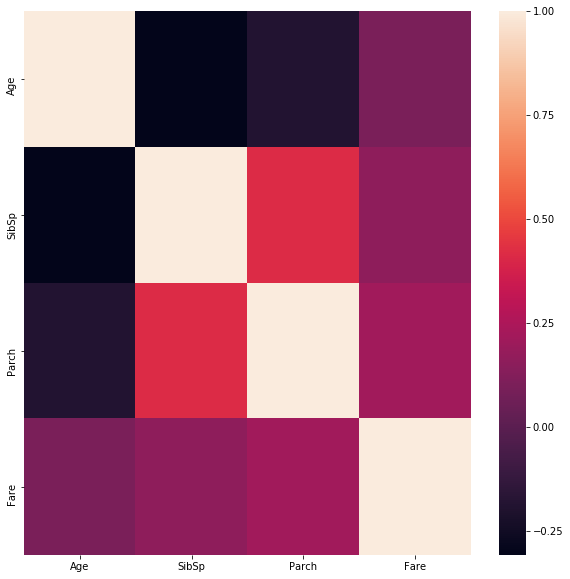

In [33]:
#set figsize
plt.figure(1, figsize=(10,10))

sns.heatmap(train_data[['Age','SibSp','Parch','Fare']].corr());

In [34]:
train_data[['Age','SibSp','Parch','Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


Looking at the heatmap, none of the numerical variables are strongly correlated with eachother. There are variables that have a weak correlation. The highest correlation is 0.4148 which is between 'Parch' and 'SibSp'. This makes sense because passengers who have another sibling onboard are probably younger and came with a parent as well.

## Data Preprocessing

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The 'PassengerId', 'Ticket', and 'Name' columns are not needed for the model so I will drop that from the training dataset.

In [36]:
train_data.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

#### Missing Data
Let's check to see which columns have NaN values.

In [37]:
train_data.columns[train_data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

There are some NaN values in the 'Age', 'Cabin', and 'Embarked' variables. Let's see how many are in each column.

In [38]:
print('There are ' + str(len(train_data) - train_data['Age'].count()) + ' NaN values in the Age column (~20%)')
print('There are ' + str(len(train_data) - train_data['Cabin'].count()) + ' NaN values in the Cabin column (~77%)')
print('There are ' + str(len(train_data) - train_data['Embarked'].count()) + ' NaN values in the Embarked column (~.2%)')

There are 177 NaN values in the Age column (~20%)
There are 687 NaN values in the Cabin column (~77%)
There are 2 NaN values in the Embarked column (~.2%)


I will not use the Cabin variable because of the high percentage of missing values.

In [39]:
train_data.drop(['Cabin'], axis=1, inplace=True)

Only 20% of the Age variable is missing so I will use imputation to fill in the missing values.<br>
<br>
I will impute missing age values using the mean age of all passengers.

In [40]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(train_data[['Age']])

train_data['Age'] = imputer.transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

Only 2 values from the Embarked variable are missing. I will impute the missing values in this column with 'S' which is the most common embarking location.

They are both female passengers that had first class tickets. It would seem sensible to assign them the embarking location of Cherbourg due to it having the highest percentage of 1st class passengers for those that embarked from there along with it having the highest survival rate among all 3 embarking locations.

In [42]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='S')
imputer = imputer.fit(train_data[['Embarked']])
train_data['Embarked'] = imputer.transform(train_data[['Embarked']])
test_data['Embarked'] = imputer.transform(test_data[['Embarked']])

There is only 1 missing value in the 'Fare' column in the testing dataset. I will fill this value in with the mean Fare value from the training dataset.

In [43]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(train_data[['Fare']])
test_data['Fare'] = imputer.transform(test_data[['Fare']])

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Encode categorical variables
I will encode the categorical variables 'Sex' and 'Embarked' using label encoding to convert each value to a number.

In [46]:
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')

test_data['Sex'] = test_data['Sex'].astype('category')
test_data['Embarked'] = test_data['Embarked'].astype('category')

train_data['Sex_encoded'] = train_data['Sex'].cat.codes
train_data['Embarked_encoded'] = train_data['Embarked'].cat.codes

test_data['Sex_encoded'] = test_data['Sex'].cat.codes
test_data['Embarked_encoded'] = test_data['Embarked'].cat.codes

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [47]:
train_data['Sex_encoded'] = train_data['Sex_encoded'].astype('int64')
train_data['Embarked_encoded'] = train_data['Embarked_encoded'].astype('int64')

test_data['Sex_encoded'] = test_data['Sex_encoded'].astype('int64')
test_data['Embarked_encoded'] = test_data['Embarked_encoded'].astype('int64')

## Build Models


In [48]:
X_train = train_data.drop(['Survived', 'Sex', 'Embarked'], axis=1)
y_train = train_data['Survived']

#### Logistic Regression

I will first start off by creating a Logistic Regression model to classify the passengers into two categories (survived and not survived).

In [49]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


I will use 5-fold cross validation to get an idea of the accuracy of the model because we don't have the response variables in the test set to perform an accuracy test on.

In [50]:
logr = LogisticRegression(random_state=1)
logr.fit(X_train, y_train)

cv_scores = cross_val_score(logr, X_train, y_train, cv=5, scoring='accuracy')
print('Scores: ' + str(cv_scores))
print('Mean score: ' + str(cv_scores.mean()))

Scores: [0.79329609 0.79888268 0.78089888 0.76404494 0.81920904]
Mean score: 0.7912663261444924


C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The average accuracy score using 5-fold cross validation is approximately 0.791. Let's look at the confusion matrix of the model and observe the recall, precision, and F1 score.

In [51]:
cv_preds = cross_val_predict(logr, X_train, y_train, cv=5)
confusion_matrix = confusion_matrix(y_train, cv_preds)

C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\17813\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

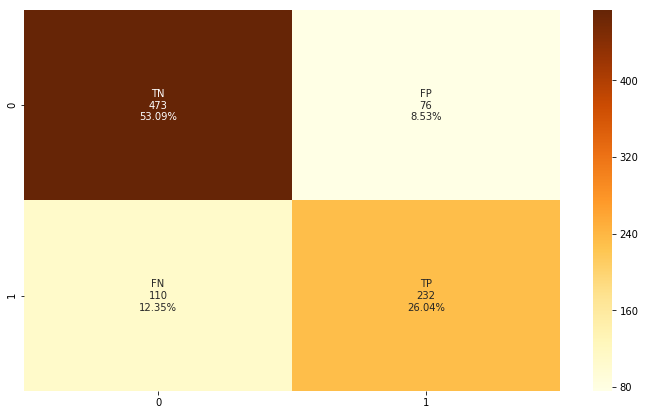

In [52]:
plt.figure(1, figsize=(12,7))

#assign labels for matrix
labels = ['TN','FP','FN','TP']

counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]

pcts = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,counts,pcts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='YlOrBr');

In [53]:
print('Precision:', precision_score(y_train, cv_preds))
print('Recall:',recall_score(y_train, cv_preds))
print('F1 score:',f1_score(y_train, cv_preds))

Precision: 0.7532467532467533
Recall: 0.6783625730994152
F1 score: 0.7138461538461539


In [54]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Looking at the recall score, the model only correctly predicted about 67.84% of the passengers who actually survived. The precision score shows out of those predicted to have survived, it had an accuracy rate of 75.32%. 
<br>
<br>
I will now plot the ROC curve and observe the AUC.

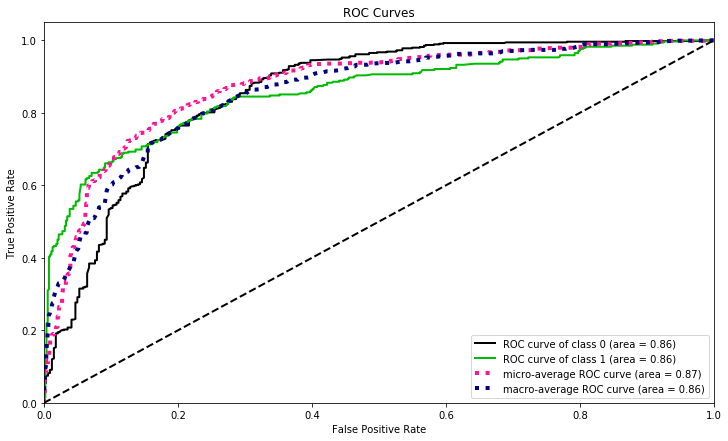

In [55]:
y_probs = logr.predict_proba(X_train)

plt.rcParams["figure.figsize"] = (12,7)
skplt.metrics.plot_roc(y_train, y_probs);

Looking at the green line in the plot above, the model has a AUC of 0.86. The tradeoff between the true positive and false positive rate is around 0.8 for the true positive rate where the false positive rate is 0.25. Higher values of the true positive rate increases the false positive rate dramatically after that point.
<br>
<br>
The scores can most likely be improved by things such as feature engineering or using a different approach for imputation. I can also try another model on the data to see if it will have a better performance. I will use a Random Forest model to see if the prediction accuracy will improve compared to Logistic Regression.

#### Random Forest

In [56]:
randomforest = RandomForestClassifier(n_estimators=50, random_state=1)
randomforest.fit(X_train, y_train)

rf_cv_scores = cross_val_score(randomforest, X_train, y_train, cv=5, scoring='accuracy')
print('Scores: ' + str(rf_cv_scores))
print('Mean score: ' + str(rf_cv_scores.mean()))

Scores: [0.78212291 0.79888268 0.86516854 0.78089888 0.84180791]
Mean score: 0.813776182385407


The average accuracy score using 5-fold cross validation is approximately 0.814. This is an improvement from the Logistic Regression cross validation accuracy by about 0.02. I will now look at the confusion matrix as well as the recall, precision, and F1 score.

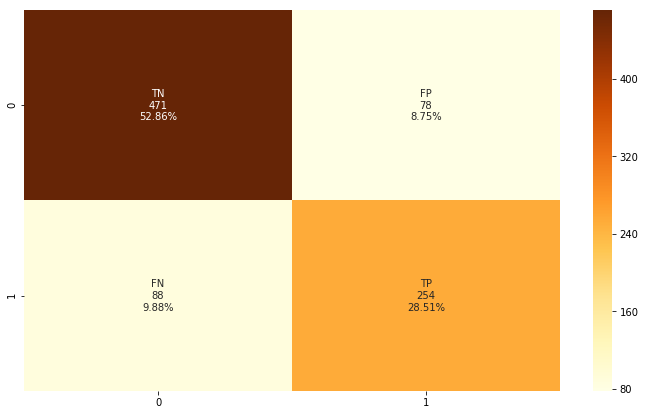

In [57]:
from sklearn.metrics import confusion_matrix

rf_cv_preds = cross_val_predict(randomforest, X_train, y_train, cv=5)
rf_confusion_matrix = confusion_matrix(y_train, rf_cv_preds)

plt.figure(1, figsize=(12,7))

#assign labels for matrix
labels = ['TN','FP','FN','TP']

counts = ['{0:0.0f}'.format(value) for value in rf_confusion_matrix.flatten()]

pcts = ['{0:.2%}'.format(value) for value in rf_confusion_matrix.flatten()/np.sum(rf_confusion_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,counts,pcts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rf_confusion_matrix, annot=labels, fmt='', cmap='YlOrBr');

In [58]:
print('Precision:', precision_score(y_train, rf_cv_preds))
print('Recall:',recall_score(y_train, rf_cv_preds))
print('F1 score:',f1_score(y_train, rf_cv_preds))

Precision: 0.7650602409638554
Recall: 0.7426900584795322
F1 score: 0.7537091988130563


Each of the measurements improved compared the the last model. The largest increase was for Recall which went up ~0.06. The F1 score increased by ~0.04. The Random Forest model performs better than the Logistic Regression model so far based on the measurements used. I try to improve the model's performance by calculating feature importance and seeing if any of the current features can be removed. 

Feature: Pclass, Score: 0.08428817003490158
Feature: Age, Score: 0.2626269840239382
Feature: SibSp, Score: 0.04591411649977399
Feature: Parch, Score: 0.03999003080034781
Feature: Fare, Score: 0.27021810763767706
Feature: Sex_encoded, Score: 0.26300266404877726
Feature: Embarked_encoded, Score: 0.033959926954584135


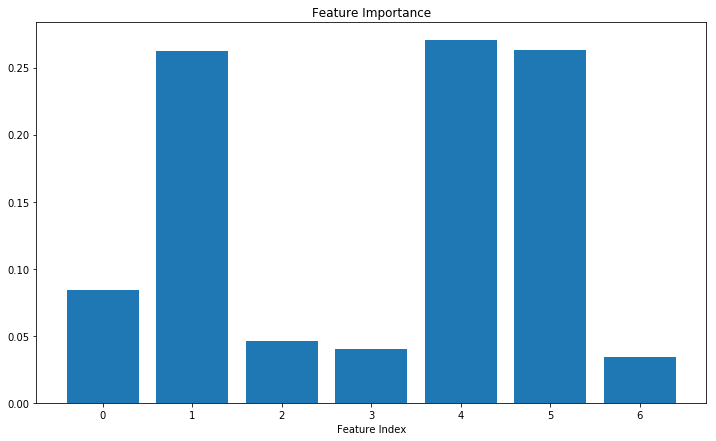

In [59]:
importance = randomforest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(X_train.columns.values[i], v))
#     print('Feature: %0d, Score: %.5f' % (i,v)))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.show()

The top four most important features in order are 'Fare', 'Sex', 'Age', and 'Pclass'. This makes sense because in the EDA, we saw that passengers who were either women or a young age had a higher survival rate compared to other passengers. It was also shown that passengers in 1st class had a higher survival rate and the fare price had a correlation to the passenger class because 1st class had higher fare prices.<br>
<br>
I will remove the 'SibSp', 'Parch', and 'Embarked' features and see if that improves the model by making it more simple.

In [61]:
X_train2 = X_train.drop(columns=['SibSp', 'Parch', 'Embarked_encoded'])

In [62]:
randomforest2 = RandomForestClassifier(n_estimators=50, random_state=1)
randomforest2.fit(X_train2, y_train)

rf2_cv_scores = cross_val_score(randomforest2, X_train2, y_train, cv=5, scoring='accuracy')
print('Scores: ' + str(rf2_cv_scores))
print('New Mean score: ' + str(rf2_cv_scores.mean()))
print('Previous Mean score: ' + str(rf_cv_scores.mean()))

Scores: [0.7877095  0.79888268 0.84831461 0.79775281 0.82485876]
New Mean score: 0.8115036703126867
Previous Mean score: 0.813776182385407


Removing the features dropped the cross validation accuracy score. Let's look at the confusion matrix and other scoring metrics.

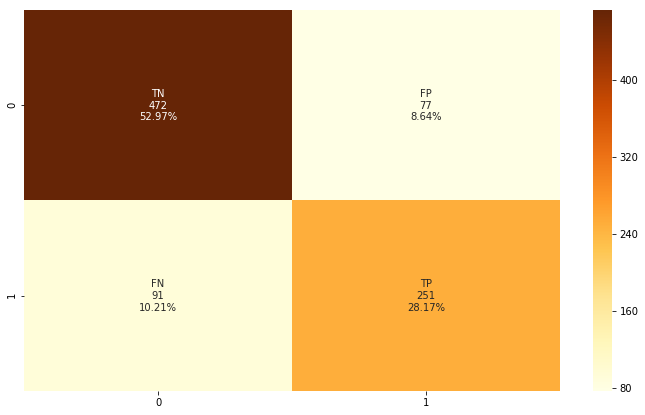

In [63]:
from sklearn.metrics import confusion_matrix

rf2_cv_preds = cross_val_predict(randomforest2, X_train2, y_train, cv=5)
rf2_confusion_matrix = confusion_matrix(y_train, rf2_cv_preds)

plt.figure(1, figsize=(12,7))

#assign labels for matrix
labels = ['TN','FP','FN','TP']

counts = ['{0:0.0f}'.format(value) for value in rf2_confusion_matrix.flatten()]

pcts = ['{0:.2%}'.format(value) for value in rf2_confusion_matrix.flatten()/np.sum(rf2_confusion_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,counts,pcts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rf2_confusion_matrix, annot=labels, fmt='', cmap='YlOrBr');

In [64]:
print('New Precision:', precision_score(y_train, rf2_cv_preds))
print('New Recall:',recall_score(y_train, rf2_cv_preds))
print('New F1 score:',f1_score(y_train, rf2_cv_preds))

print('Previous Precision:', precision_score(y_train, rf_cv_preds))
print('Previous Recall:',recall_score(y_train, rf_cv_preds))
print('Previous F1 score:',f1_score(y_train, rf_cv_preds))

New Precision: 0.7652439024390244
New Recall: 0.7339181286549707
New F1 score: 0.7492537313432837
Previous Precision: 0.7650602409638554
Previous Recall: 0.7426900584795322
Previous F1 score: 0.7537091988130563


Removing the features from the original training dataset did not improve the performance. Instead, it lowered each score by a bit. I also tested out the scores by removing different combinations of the three features, but each time resulted in a model that had a lower score than the previous one with all three features included.<br>
<br>
I will use the Random Forest model which was trained on my original dataset as my final model to submit on Kaggle. Possible ways to improve the overall score would be to use feature engineering, or trying other types of models.

In [67]:
X_test = pd.get_dummies(test_data[['Pclass','Age','SibSp','Parch','Fare','Sex_encoded','Embarked_encoded']])

randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(r'C:\Users\17813\Desktop\Python Datasets\Titanic\my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


The submission yielded a score of 0.74880 on Kaggle.